## 用时间序列的相关方法进行检验
- 筛选公司
- 预测

In [1]:
import sys
sys.path.append("..")
from roeProcessTools import *

In [5]:
# 转化为时间序列数据
dirPath = "/Users/zch/Desktop/internship/data/"
paths = {"chem":"chemClean32.xlsx", "mach":"machClean32.xlsx", "food":"foodClean32.xlsx", "elec":"elecClean32.xlsx"}

In [7]:
temp = pd.read_excel(dirPath+paths["chem"])

In [12]:
temp.head()

,code,name,2000-12,2001-03,2001-06,2001-09,2001-12,2002-03,2002-06,2002-09,...,2018-06,2018-09,2018-12,2019-03,2019-06,2019-09,2019-12,2020-03,2020-06,2020-09
0,000059.SZ,华锦股份,NaN,NaN,NaN,0.2600,-0.1924,0.2154,0.5451,-0.58250,...,3.5560,2.26990,-0.0284,2.5835,1.43870,2.8470,0.5103,-5.0940,1.72490,3.9107
1,000096.SZ,广聚能源,NaN,NaN,NaN,NaN,NaN,1.9954,2.2516,1.97330,...,2.7503,0.63060,0.4704,0.4159,1.00920,2.7707,0.7215,0.0677,0.94640,3.3680
2,000159.SZ,国际实业,NaN,NaN,NaN,0.9284,3.0246,0.2253,0.2197,-1.57466,...,-1.1967,3.16780,1.5499,1.0988,-0.56680,-1.0599,1.9216,-1.2682,4.31010,-0.1345
3,000301.SZ,东方盛虹,NaN,NaN,NaN,1.8798,2.0269,1.4324,2.0077,1.52400,...,1.0266,-0.20786,1.5276,2.4191,3.12772,2.9561,3.0949,1.3506,-0.20786,0.9960
4,000420.SZ,吉林化纤,NaN,NaN,NaN,NaN,NaN,0.2867,1.2641,0.03650,...,2.4156,1.70320,0.1512,0.6440,1.75080,0.3671,0.3048,0.5129,-3.25480,-4.4926


In [16]:
columns = temp.code+" "+temp.name

In [24]:
tempT = temp.iloc[:,2:].T

In [25]:
tempT.columns = columns

In [71]:
tempT

,000059.SZ 华锦股份,000096.SZ 广聚能源,000159.SZ 国际实业,000301.SZ 东方盛虹,000420.SZ 吉林化纤,000510.SZ 新金路,000525.SZ 红太阳,000553.SZ 安道麦A,000554.SZ 泰山石油,000565.SZ 渝三峡A,...,601208.SH 东材科技,601216.SH 君正集团,601233.SH 桐昆股份,601678.SH 滨化股份,603002.SH 宏昌电子,603077.SH 和邦生物,603299.SH 苏盐井神,900908.SH 氯碱B股,900909.SH 华谊B股,900921.SH 丹科B股
2000-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.151000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.315900,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.720000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-09-01,0.2600,NaN,0.9284,1.87980,NaN,NaN,NaN,0.336600,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-01,-0.1924,NaN,3.0246,2.02690,NaN,NaN,NaN,-0.329700,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-01,2.8470,2.7707,-1.0599,2.95610,0.3671,0.1083,0.84110,0.901900,0.03990,3.1061,...,0.5791,2.7965,5.9160,1.54000,2.1307,1.50820,0.7139,3.8799,0.1876,-5.79150
2019-12-01,0.5103,0.7215,1.9216,3.09490,0.3048,1.5634,-1.95955,-1.398895,0.47600,0.0741,...,1.3859,2.9527,2.3092,1.48050,2.7017,0.46310,0.6729,3.9815,0.4653,-11.02128
2020-03-01,-5.0940,0.0677,-1.2682,1.35060,0.5129,3.0451,0.16960,-0.074500,-0.75216,0.1471,...,1.0364,3.2648,2.2066,0.59796,1.3916,-0.27910,1.8918,1.8769,-1.1032,-3.35900
2020-06-01,1.7249,0.9464,4.3101,-0.20786,-3.2548,1.2119,1.28960,0.980100,0.91290,1.6949,...,2.0258,3.7607,2.8979,0.59796,2.5968,0.68150,1.8699,1.2385,0.6181,-4.65090


In [35]:
tempT.set_index(pd.to_datetime(tempT.index).date, drop=True, inplace=True)

In [36]:
tempT

,000059.SZ 华锦股份,000096.SZ 广聚能源,000159.SZ 国际实业,000301.SZ 东方盛虹,000420.SZ 吉林化纤,000510.SZ 新金路,000525.SZ 红太阳,000553.SZ 安道麦A,000554.SZ 泰山石油,000565.SZ 渝三峡A,...,601208.SH 东材科技,601216.SH 君正集团,601233.SH 桐昆股份,601678.SH 滨化股份,603002.SH 宏昌电子,603077.SH 和邦生物,603299.SH 苏盐井神,900908.SH 氯碱B股,900909.SH 华谊B股,900921.SH 丹科B股
2000-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.151000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.315900,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.720000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-09-01,0.2600,NaN,0.9284,1.87980,NaN,NaN,NaN,0.336600,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-01,-0.1924,NaN,3.0246,2.02690,NaN,NaN,NaN,-0.329700,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-01,2.8470,2.7707,-1.0599,2.95610,0.3671,0.1083,0.84110,0.901900,0.03990,3.1061,...,0.5791,2.7965,5.9160,1.54000,2.1307,1.50820,0.7139,3.8799,0.1876,-5.79150
2019-12-01,0.5103,0.7215,1.9216,3.09490,0.3048,1.5634,-1.95955,-1.398895,0.47600,0.0741,...,1.3859,2.9527,2.3092,1.48050,2.7017,0.46310,0.6729,3.9815,0.4653,-11.02128
2020-03-01,-5.0940,0.0677,-1.2682,1.35060,0.5129,3.0451,0.16960,-0.074500,-0.75216,0.1471,...,1.0364,3.2648,2.2066,0.59796,1.3916,-0.27910,1.8918,1.8769,-1.1032,-3.35900
2020-06-01,1.7249,0.9464,4.3101,-0.20786,-3.2548,1.2119,1.28960,0.980100,0.91290,1.6949,...,2.0258,3.7607,2.8979,0.59796,2.5968,0.68150,1.8699,1.2385,0.6181,-4.65090


In [38]:
tempCompany = tempT["000553.SZ 安道麦A"]

In [50]:
tempCompany.pct_change()

2000-12-01          NaN
2001-03-01     1.092053
2001-06-01     1.279202
2001-09-01    -0.532500
2001-12-01    -1.979501
                ...    
2019-09-01    -0.091101
2019-12-01    -2.551053
2020-03-01    -0.946744
2020-06-01   -14.155705
2020-09-01    -0.906642
Name: 000553.SZ 安道麦A, Length: 80, dtype: float64

In [44]:
from statsmodels.tsa import stattools

<StemContainer object of 3 artists>

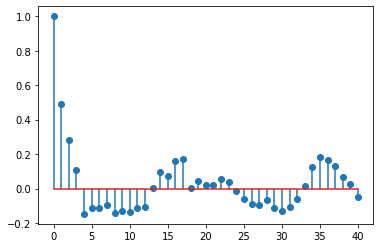

In [108]:
plt.stem(stattools.acf(tempCompany.pct_change(4).dropna()))

In [62]:
# 单位根检验
from statsmodels.tsa.stattools import adfuller

In [80]:
adfresult = adfuller(tempCompany.pct_change(4).dropna())

In [109]:
# showOne("000553.SZ", temp)

In [81]:
adfresult

(-5.0445051058135215,
 1.81059759028144e-05,
 0,
 75,
 {'1%': -3.520713130074074,
  '5%': -2.9009249540740742,
  '10%': -2.5877813777777776},
 300.9658007759827)

In [82]:
from statsmodels.tsa.stattools import pacf

<StemContainer object of 3 artists>

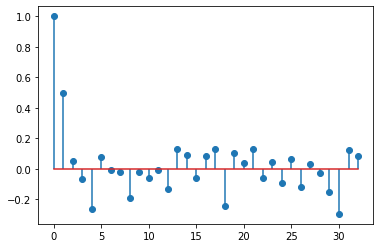

In [106]:
plt.stem(pacf(tempCompany.pct_change(4).dropna(), 32))

In [100]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

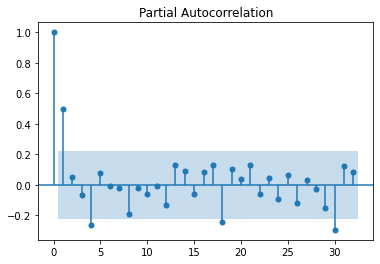

In [112]:
a = plot_pacf(tempCompany.pct_change(4).dropna(), lags=32)

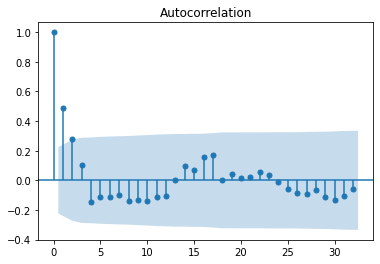

In [113]:
b = plot_acf(tempCompany.pct_change(4).dropna(),lags=32)

### 尝试根据adfuller的结果分类

In [145]:
results = []
for label, content in tempT.iteritems():
    pct = content.pct_change(4).dropna()
    if adfuller(pct)[1]<0.05:
        results.append(True)
    else:
        results.append(False)

In [152]:
selected1 = tempT.iloc[:,results]

In [154]:
selected1.shape

(80, 153)

In [157]:
stds = np.std(temp.iloc[:,2:],ddof=1, axis=1)

In [163]:
for i, v in stds.iteritems():
    print(i, v)

0 2.930570533260902
1 1.8443966739548099
2 2.0843903895825613
3 0.8808983661895589
4 5.673644357011684
5 3.160659555684102
6 1.8115458856677384
7 2.267734941342924
8 1.1217273291227685
9 1.1566985693202245
10 1.3317066238863204
11 1.0356099413605682
12 3.350968931406691
13 2.2245689321586237
14 3.6346211344130612
15 1.6607356707030945
16 3.31947378287655
17 2.3015297952462865
18 1.9364030732871802
19 1.570515965275174
20 3.1206885953632804
21 1.711179951998962
22 1.0849753363959291
23 1.6440671033735867
24 6.8928804105198545
25 3.8679777755317435
26 1.2331190675771218
27 1.951052729836627
28 1.481891753884878
29 1.4278474794782385
30 0.8830171366135425
31 6.416430317967646
32 2.0364031952290365
33 2.2045210320963853
34 2.0082574535931395
35 1.9555869590933654
36 2.7755187827704098
37 2.4784180289826367
38 1.7702007013751746
39 1.8996680480946624
40 1.976007064127391
41 3.4160679203141453
42 1.9231960754963793
43 2.4511244658451474
44 2.748882822090086
45 3.414362364864973
46 8.32796625

In [167]:
temp.iat[49,0]

'002172.SZ'

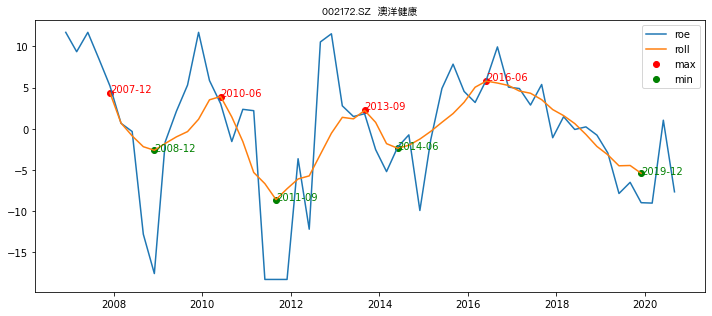

In [168]:
showOne('002172.SZ', temp)

In [169]:
# 白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox

In [174]:
a = acorr_ljungbox(tempCompany, boxpierce=True)

In [176]:
for each in a:
    print(each[:10])

[36.8998079  63.11985409 80.93600304 93.90552224 95.59118665 95.61727868
 95.63567992 95.66975274 96.62666382 98.22685937]
[1.24358201e-09 1.96651759e-14 1.93308522e-17 1.94754972e-19
 4.48373779e-19 2.05644651e-18 8.57412905e-18 3.26715396e-17
 7.55638596e-17 1.23304316e-16]
[35.54981493 60.49083448 77.22063288 89.24116287 90.7829291  90.80647556
 90.82285716 90.85277475 91.68131971 93.04734031]
[2.48610666e-09 7.32119864e-14 1.21081573e-16 1.90848398e-18
 4.60080141e-18 2.06012034e-17 8.38366354e-17 3.12123717e-16
 7.48297761e-16 1.32935417e-15]
